<a href="https://colab.research.google.com/github/Existanze54/sirius-machine-learning-2024/blob/main/Lections/L04_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Основные алгоритмы машинного обучения

## Лекция 4

### Метод опорных векторов.

In [ ]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

Сегодня мы обсудим метод классического обучения, который, несмотря на то, что был предложен очень давно, до сих пор решает некоторые задачи на удивление с хорошим качеством.

Начнем мы с посмотрим на вот такой игрушечный пример с датасетом, хранящим информацию о ирисах



Построим график, на котором отложим то, как делятся виды setosa и versicolor по длине и ширине лепестка  

In [ ]:
iris= datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
def plot_2iris(iris= datasets.load_iris()):
  X = iris["data"][:, (2, 3)]  # petal length, petal width
  y = iris["target"]
  setosa_or_versicolor = (y == 0) | (y == 1)
  X = X[setosa_or_versicolor]
  y = y[setosa_or_versicolor]
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
  plt.ylabel("Petal width", fontsize=14)
  plt.xlabel("Petal length", fontsize=14)
  plt.axis([0, 5.5, 0, 2])

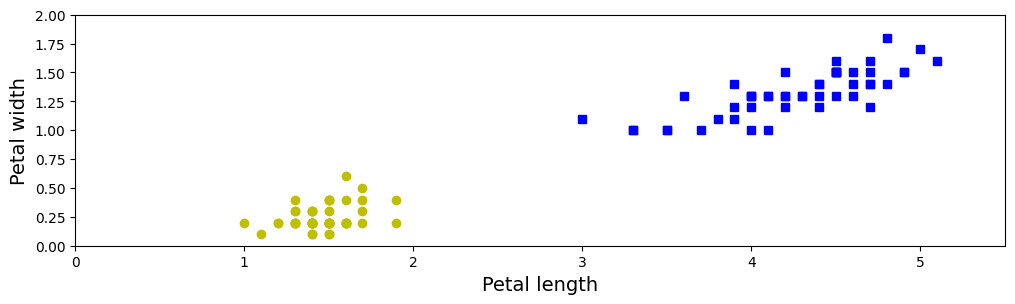

In [ ]:
plt.figure(figsize=(12,3))
plot_2iris()
plt.show()

Видим, что разделение идеально.
Но мы хотим для любого цвветка, померив длину и ширину лепестка, говорить точно - к какому из двух видов он относится. Нам нужно провести границу - **решающую границу**, с одной стороны от которой мы говорим, что цветок - setosa, а с другой - versicolor

Но как ее провести?

Можно так:

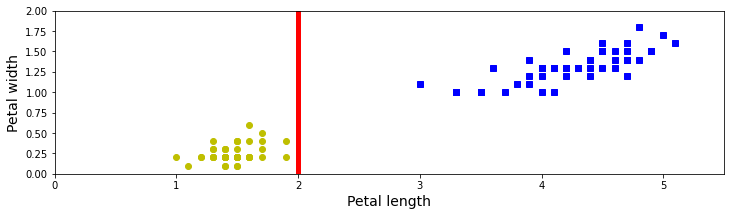

In [ ]:
plt.figure(figsize=(12,3))
plot_2iris()
plt.axvline(x=2, ymin = 0, ymax = 2, color="red", linewidth=5)
plt.show()

Или так

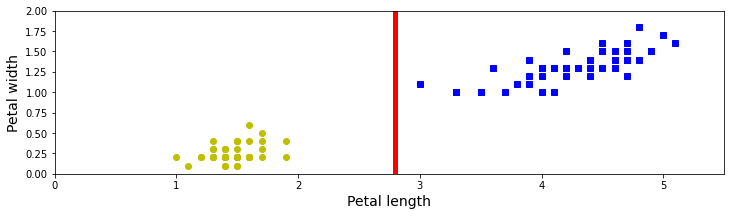

In [ ]:
plt.figure(figsize=(12,3))
plot_2iris()
plt.axvline(x=2.8, ymin = 0, ymax = 2, color="red", linewidth=5)
plt.show()

Вообще говоря, можно проводить не только горизонтальные линии. Можно и с наклоном

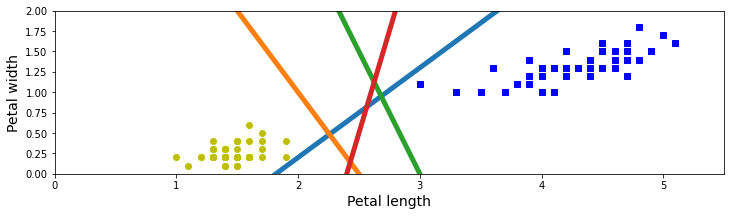

In [ ]:
plt.figure(figsize=(12,3))
plot_2iris()
x0 = np.linspace(0, 5, 200)
for (b, k) in ((1.1, 2), (-2, -5), (-3, -9), (5, 12)):
  y0 = b * x0 - k
  plt.plot(x0, y0, linewidth=5)
plt.show()

## Maximum margin classifier

Мы хотим провести такую разделяющую границу, чтобы минимальное расстояние между ней и объектом из нашей обучающей выборки было максимально

$$\max_b \min dist(x, b)$$

$$ \min dist(x, b) $$ называется **зазором** (margin)

In [ ]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

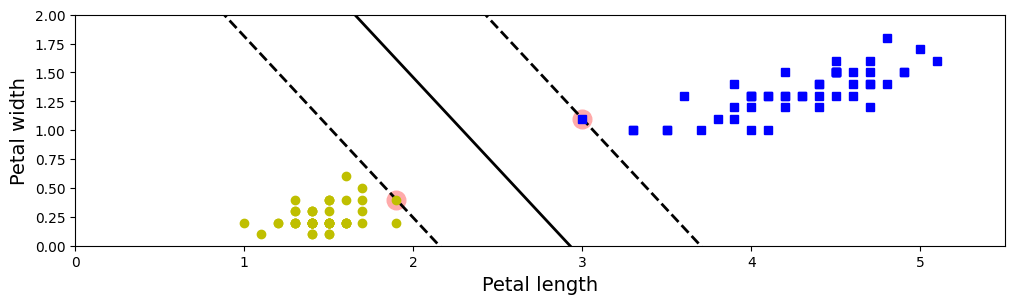

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf)
svm_clf.fit(X, y)

x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,3))
plot_svc_decision_boundary(svm_clf, 0, 5.5)

plot_2iris()
plt.show()

Вроде бы все работает замечательно. Но что произойдет, если мы добавим один выброс - цветок, который мы разметили неверно?

In [ ]:
svm_clf = SVC(kernel="linear", C=np.inf)
X_out = np.concatenate([X, np.array([3.2, 0.8]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf.fit(X_out, y_out)

SVC(C=inf, kernel='linear')

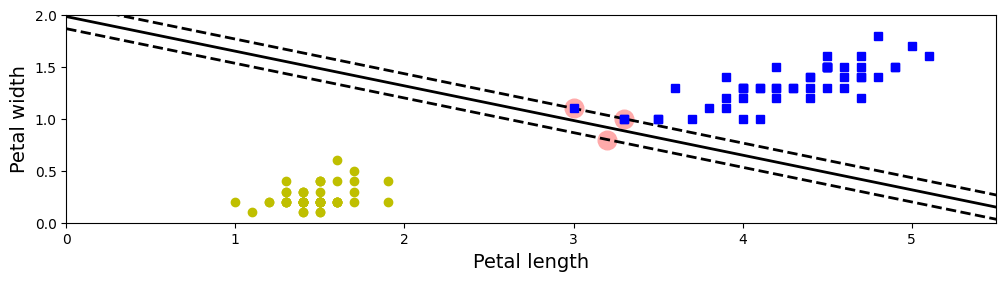

In [ ]:
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(12,2.7))

plot_svc_decision_boundary(svm_clf, 0, 5.5)
plot_2iris()
plt.axis([0, 5.5, 0, 2])
plt.show()

Наше решение очень сильно поменялось. Всего из-за одного выброса. У наше модели большой variance - она чувствительна к шуму в данных.


Более того, мы можем добавить такой выброс, что мы в принципе не сможем провести прямую, которая однозначно разделит точки

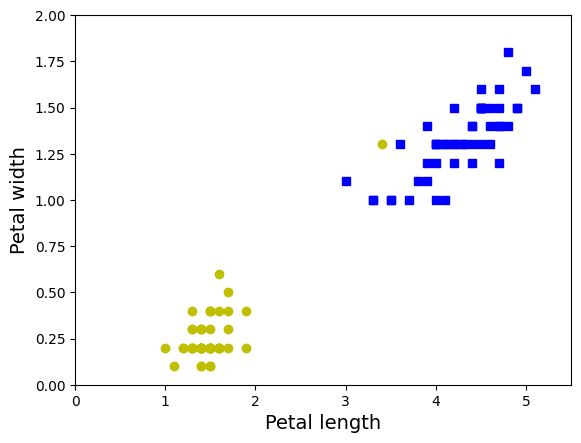

In [ ]:
X_out = np.concatenate([X, np.array([3.2, 0.8]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

## Soft Margin Classifier = Support Vector Classifier

Разрешим нашей модели частично игнорировать выбросы. Пусть за то, насколько сильно модель может проигнорировать выбросы, будет отвечать параметр C. Чем он больше - тем бОльший штраф мы даем за любой объект, который лежит не с той стороны обучающей выборки

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/svm_c.png" width="400">

В такой постановке разделение возможно

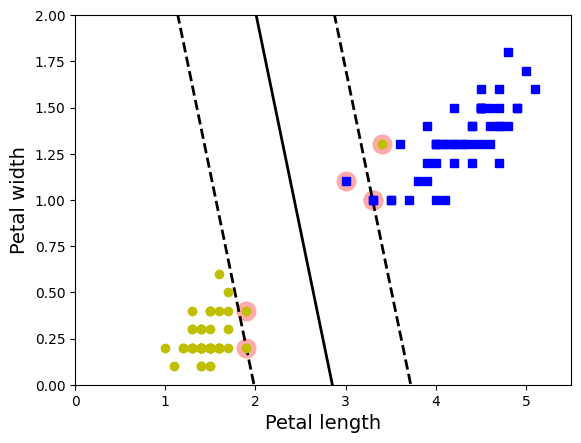

In [ ]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_out, y_out)

plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Меняя параметр C, мы будем менять и чувствительность нашего решения к шуму - чем больше C - больше мы реагируем на шум

## Метод опорных векторов

По сути мы с вами получили метод опорных векторов. Остается один вопрос - а почему метод вдруг назван методом **опорных векторов**

support vectors

Оказыввается, то, с какой стороны от решающей границы лежит объект, который мы классифицируем определяется методом на основании **decision function**. Если ее значение меньше 0 - объект лежит со стороны нулевого класса, больше - со стороны 1 класса.



Сама же функция вычисляется по следующей формуле:

$$ decision_j = \sum_{i \in train\_objects} c_i y_i <x_i, x_j> + b $$



Что в ней написано?

Для определения решения для некоего объекта j, мы считаем сумму его скалярных произведений с объектами выборки, умноженными на некий коэффициент $c_i$ и метку класса $y_i$.

Скалярное произведение мы считаем в пространстве признаков наших объектов.

y_i принимает значение -1 для объектов нулевого класса и +1 для позитивного

Остается разобраться с $c_i$


Этот коэффиент равен 0 почти для всех обхектов из тренировочной выборки кроме тех, что определяют границу (на рисунке подсвечены)

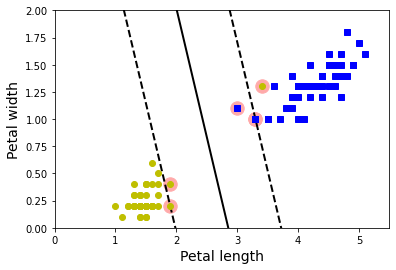

In [ ]:
X_out = np.concatenate([X, np.array([3.4, 1.3]).reshape(1, 2)], axis=0)
y_out = np.concatenate([y, np.array([0])])

svm_clf = SVC(kernel="linear", C=1)
svm_clf.fit(X_out, y_out)

plot_svc_decision_boundary(svm_clf, 0, 5.5)

plt.plot(X_out[:, 0][y_out==1], X_out[:, 1][y_out==1], "bs")
plt.plot(X_out[:, 0][y_out==0], X_out[:, 1][y_out==0], "yo")
plt.ylabel("Petal width", fontsize=14)
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.show()

Все объекты, у которых $c_i != 0$ и называются опорными векторами. Формула может быть переписана, тем самым, следующим образом:

$$ decision_j = \sum_{i \in support\_vectors} c_i y_i <x_i, x_j> + b $$



То есть решение о принадлежности объекта к тому или иному классу выносится на основе (обычно) малой части тренировочной выборке - опорных векторах - потому метод и называется методом опорных векторов

## Переход в пространство большей размерности

Представим себе, что в исходном пространстве признаков наши объекты в принципе неразделимы.






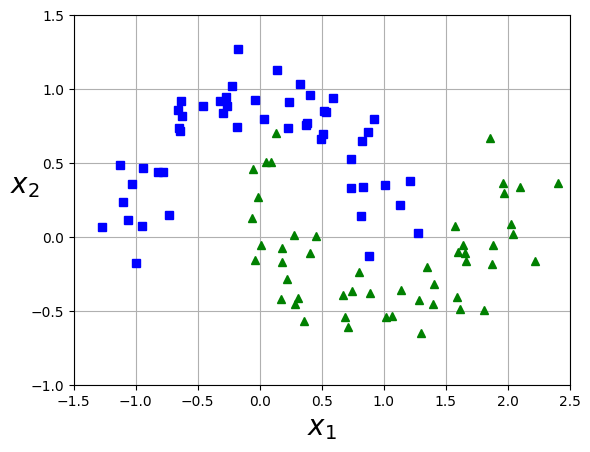

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

Тогда кажется разумным перейти в пространство бОльшей размерности и уже там применить наш метод.


Например, можно взять и вместо исходных признаков

$$x_1, x_2$$

применять их комбинации вплоть до третьей степени получающегося полинома

$x_1,~x_2,~x_1^2,~x_2^2,~x_1x_2, ~x_1^2x_2,~x_2^2x_1,~x_1^3,~x_2^3 $

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


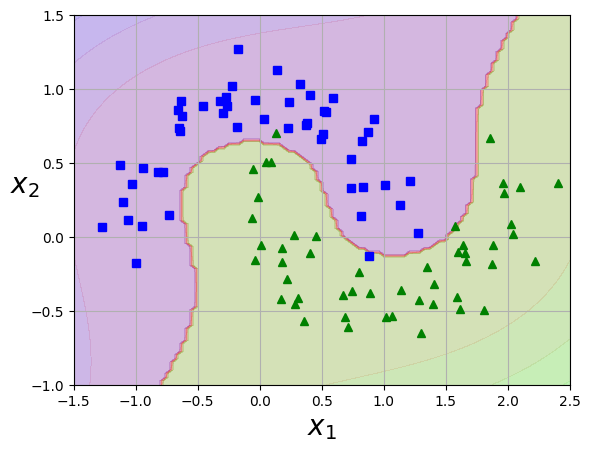

In [ ]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)


clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

clf.fit(X, y)
plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

Подход работает, но есть один нюанс.

Что произойдет, если пространство признаков, в которое нам надо перейти - велико, и объектов у нас много?

Скорее всего - мы просто не сможем обучить модель. Кончится оперативная память и все упадет.

### Kernel trick

Но в случае SVM за счет того, что функция решений выглядит следующим образом:

$$ decision_j = \sum_{i \in support\_vectors} c_i y_i <x_i, x_j> + b $$

можно сделать иначе. Для подсчета ее значения нам не нужно знать, как выглядят объекты в пространстве бОльшей размерности, а только уметь узнавать скалярное произведение между ними.

Оказывается, в некоторых случаях это можно делать, не переходя в это пространство, а вычисляя специальную **kernel function**

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/svm_kernel_trick.png" width="500">

Примеры ядер :

* $k(x_i, x_j) = (<x_i, x_j> + c)^d, с, d \in \mathbb{R}$ - полиномиальное ядро, считает расстояние между объектами в пространстве размерности d

* $k(x_i, x_j) = \frac{1}{z} e^{-\frac{h(x_i, x_j)^2}{h}}$ - радиальная базисная функция RBF





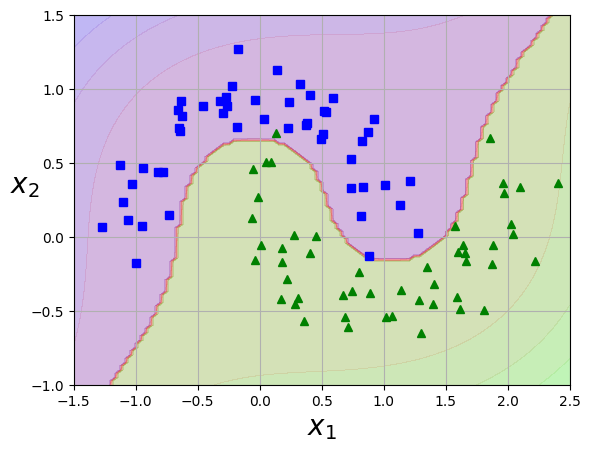

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)



clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=10))
    ])

clf.fit(X, y)
plot_predictions(clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

## Вероятности

SVM сам по себе не умеет предсказывать вероятности. Есть только decision function.

К этому можно отнестись философски, так как многим методам/оценкам вероятность и не нужна.

В чисто виде decision function применять в роли вероятности нельзя - она не ограничена на отрезке от 0 до 1, у нее нет точного максимума и точного минимума. Кроме того, она плохо отображает вероятность (даже если мы отнормируем ее как-то в отрезок от 0 до 1):

In [ ]:
# sklearn
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss
def plot_calibration_curve(clf, X_test, Y_test, name='classifier'):
    plt.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    y_pred = clf.predict(X_test)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    clf_score = brier_score_loss(Y_test, prob_pos, pos_label=y.max())
    fraction_of_positives, mean_predicted_value = \
            calibration_curve(Y_test, prob_pos, n_bins=10)

    plt.plot(mean_predicted_value, fraction_of_positives, "s-",
                label="%s Score=(%1.3f)" % (name, clf_score))


    plt.ylabel("Fraction of positives")
    plt.ylim([-0.05, 1.05])
    plt.legend(loc="best")

In [ ]:
from sklearn.model_selection import train_test_split
X, Y = datasets.make_classification(n_samples=10000, n_features=20,
                                    n_informative=2, n_redundant=10,
                                    random_state=777)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.99,
                                                    random_state=777)

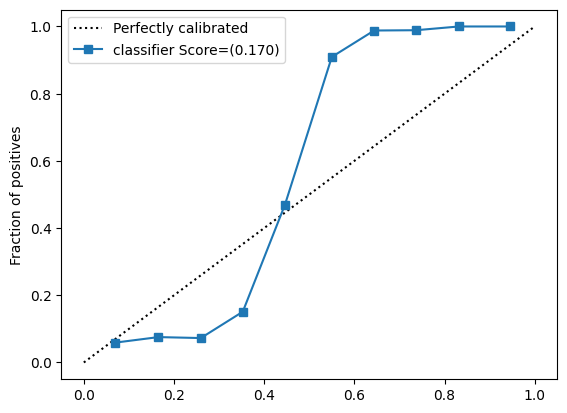

In [ ]:
svm = SVC(kernel="linear")
svm.fit(X_train, Y_train)
plot_calibration_curve(svm, X_test, Y_test)

В идеале, если модель предсказывает вероятность 0.2, то только 20% объектов, для которых предсказана такая вероятность, должны относиться к 1 классу. И аналогично для других вероятностей.

В нашем же случае мы видим серьезное отклонение

Но можно получить вероятности из decision function специальной процедурой. Конкретно - подаем decision function в качестве единственного признака классификатору, который вероятности предсказывать умеет.

Например, логистической регресии

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/platt_scaling.png" width="500">

Можно ли учить логистическую регрессию на той же выборке, на которой учили SVM? Нет.

Потому используем либо отдельный валидационный датасет. Либо учимся kfold кроссвалидацией, которую разберем позже.

### Plat scaling

Процедура реализована в SVM и ее можно запустить передав нужный параметр

Что мы хотим видеть для вероятностей, предсказываемых идеальным классификатором?

Мы хотим, чтобы доля объектов, принадлежащих классу X, для которых классификатор выдал вероятность p принадлежать классу X, была равна p

Если разбить все наши объекты на бины по предсказываемым вероятностям, то можно для каждого бина посчитать долю объектов целевого класса и построить полученную зависимость. В идеале должна получиться прямая

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X, Y = datasets.make_classification(n_samples=10000, n_features=20,
                                    n_informative=2, n_redundant=10,
                                    random_state=777)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.99,
                                                    random_state=777)

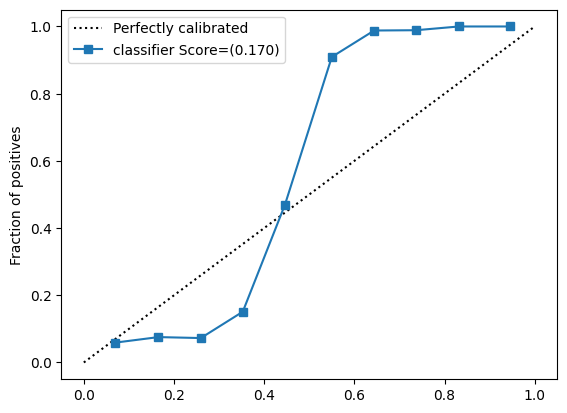

In [ ]:
svm = SVC(kernel="linear")
svm.fit(X_train, Y_train)
plot_calibration_curve(svm, X_test, Y_test)

Можем применить встроенный в SVC Plat Scaling

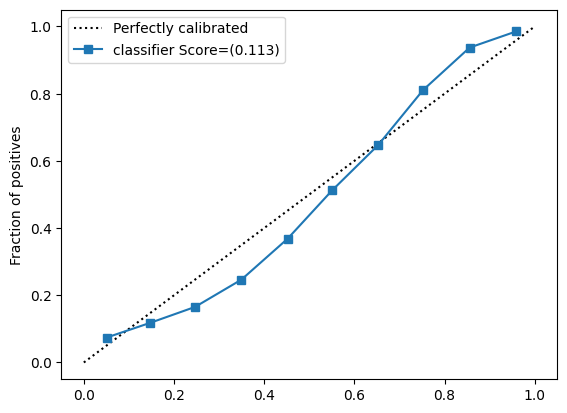

In [ ]:
svm = SVC(kernel="linear",  probability=True)
svm.fit(X_train, Y_train)
plot_calibration_curve(svm, X_test, Y_test)

## Переход от бинарной классификации к мультиклассовой

Напрямую, мы не можем при помощи такого SVM решить задачу классификацию, отличную от бинарной. Поэтому чаще всего SVM упоминается в контекста бинарной классификации.

Однако существуют подходы, позволяющие использовать SVM и для мультиклассовой классификации

Один из них состоит в обучении множества бинарных классификаторов отличать:
1. класс 0 от остальных
2. класс 1 от остальных
3. ....

И далее выбирать класс, про который предсказание было наиболее верным

![alttext](https://matlab4engineers.com/wp-content/uploads/2017/11/intro1.png)

## Задача регрессии

Можно адаптировать метод опорных векторов и для задачи регрессии. Однако разбирать в курсе теорию этого мы не будем

# Применение метода опорных векторов в биологии

Метод опорных векторов до сих применяется в биологии, так как он хорошо работает на малых объемах данных. С правильно заданным пространством признаков SVM может работать лучше, чем нейросеть, обучаемая с "нуля".

К недостаткам SVM можно отнести сравнительно малую скорость обучения модели и то, что при увеличении количества данных, качество SVM растет не так быстро, как у других методов. Кроме того, transfer learning с примением в качестве исходной модели SVM затруднителен.

Рассмотрим пример одного из наиболее успешных применений SVM в биологии - gkmSVM + deltaSVM

### k-mer для классификации последовательностей

Часто перед нами встает следующая задача: есть последовательности, содержащие определенный сигнал и последовательности, его не содержащие.
Необходимо научиться отличать одни последовательности от других.

Для решения такого рода задач можно использовать методы машинного обучения. Остается как-то описать наши последовательности.



Часто для описания последовательностей используют просто то, сколько kmer - подпоследовательностей длины k встречается в каждой из них


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/kmer.png" width="500">

Описывать можно по-разному - например, сколько раз каждый kmer встретился
Или просто - встретился kmer или нет



<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/kmer_count.png" width="500">

In [ ]:
from itertools import product

def all_kmers(kmer_size):
    return [''.join(x) for x in product(*["ATGC" for i in range(kmer_size)])]

def kmer_count(seq, kmer_size):
    dt = {x: 0 for x in all_kmers(kmer_size) }
    print(dt)
    for i in range(0, len(seq) - kmer_size + 1):
        kmer = seq[i:i+kmer_size]
        dt[kmer] += 1
    return dt

In [ ]:
kmer_count("ATGAAGAA", 2)

{'AA': 0, 'AT': 0, 'AG': 0, 'AC': 0, 'TA': 0, 'TT': 0, 'TG': 0, 'TC': 0, 'GA': 0, 'GT': 0, 'GG': 0, 'GC': 0, 'CA': 0, 'CT': 0, 'CG': 0, 'CC': 0}


{'AA': 2,
 'AT': 1,
 'AG': 1,
 'AC': 0,
 'TA': 0,
 'TT': 0,
 'TG': 1,
 'TC': 0,
 'GA': 2,
 'GT': 0,
 'GG': 0,
 'GC': 0,
 'CA': 0,
 'CT': 0,
 'CG': 0,
 'CC': 0}

In [ ]:
kmer_count("ATGAAGAA", 3)

{'AAA': 0, 'AAT': 0, 'AAG': 0, 'AAC': 0, 'ATA': 0, 'ATT': 0, 'ATG': 0, 'ATC': 0, 'AGA': 0, 'AGT': 0, 'AGG': 0, 'AGC': 0, 'ACA': 0, 'ACT': 0, 'ACG': 0, 'ACC': 0, 'TAA': 0, 'TAT': 0, 'TAG': 0, 'TAC': 0, 'TTA': 0, 'TTT': 0, 'TTG': 0, 'TTC': 0, 'TGA': 0, 'TGT': 0, 'TGG': 0, 'TGC': 0, 'TCA': 0, 'TCT': 0, 'TCG': 0, 'TCC': 0, 'GAA': 0, 'GAT': 0, 'GAG': 0, 'GAC': 0, 'GTA': 0, 'GTT': 0, 'GTG': 0, 'GTC': 0, 'GGA': 0, 'GGT': 0, 'GGG': 0, 'GGC': 0, 'GCA': 0, 'GCT': 0, 'GCG': 0, 'GCC': 0, 'CAA': 0, 'CAT': 0, 'CAG': 0, 'CAC': 0, 'CTA': 0, 'CTT': 0, 'CTG': 0, 'CTC': 0, 'CGA': 0, 'CGT': 0, 'CGG': 0, 'CGC': 0, 'CCA': 0, 'CCT': 0, 'CCG': 0, 'CCC': 0}


{'AAA': 0,
 'AAT': 0,
 'AAG': 1,
 'AAC': 0,
 'ATA': 0,
 'ATT': 0,
 'ATG': 1,
 'ATC': 0,
 'AGA': 1,
 'AGT': 0,
 'AGG': 0,
 'AGC': 0,
 'ACA': 0,
 'ACT': 0,
 'ACG': 0,
 'ACC': 0,
 'TAA': 0,
 'TAT': 0,
 'TAG': 0,
 'TAC': 0,
 'TTA': 0,
 'TTT': 0,
 'TTG': 0,
 'TTC': 0,
 'TGA': 1,
 'TGT': 0,
 'TGG': 0,
 'TGC': 0,
 'TCA': 0,
 'TCT': 0,
 'TCG': 0,
 'TCC': 0,
 'GAA': 2,
 'GAT': 0,
 'GAG': 0,
 'GAC': 0,
 'GTA': 0,
 'GTT': 0,
 'GTG': 0,
 'GTC': 0,
 'GGA': 0,
 'GGT': 0,
 'GGG': 0,
 'GGC': 0,
 'GCA': 0,
 'GCT': 0,
 'GCG': 0,
 'GCC': 0,
 'CAA': 0,
 'CAT': 0,
 'CAG': 0,
 'CAC': 0,
 'CTA': 0,
 'CTT': 0,
 'CTG': 0,
 'CTC': 0,
 'CGA': 0,
 'CGT': 0,
 'CGG': 0,
 'CGC': 0,
 'CCA': 0,
 'CCT': 0,
 'CCG': 0,
 'CCC': 0}

#### Проблема подхода

Основная проблема данного подхода - экспоненциальное увеличение числа различных kmer - а, следовательно, и объема потребляемой памяти.

Кроме того, признаки становятся очень разреженными, и чем большие k используются, тем больше видна проблема того, что kmer, отличающиеся на одну букву, считаются абсолютно разными в таком признаковом пространстве.

## gkmSVM

Для решения этой проблемы были предложены **gapped kmers** - когда мы учитываем, что два kmer, которые отличаются друг от друга каким-то числом замен или вставок/удалений - тоже похожи.


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/gapped_kmer.png" width="500">

Модель, которая использует это при классификации последовательностей - gkmSVM (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4937197/)

## deltaSVM

gkmSVM работает долго, в том числе на предсказании, где это критично. Можно огрубить модель.







Для этого они предложили делать следующее

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/deltaSVM1.png" width="500">

Сначала обучаем gkmSVM модель разделять последовательности с сигналом и без него.

После этого, при помощи decision function gkmSVM скорим все возможные kmer определенного размера, например, 10меры.

Теперь можем быстро получать оценку для каждой последовательности

<img src="https://kodomo.fbb.msu.ru/FBB/year_21/deltaSVM0.5.png" width="500">


Далее автора gkmSVM предложили интересный подход для другой задачи - классификации замен в регуляторных регионах генома на нейтральные и вредные.


<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/deltaSVM2.png" width="500">

После этого делаем следующее - пусть у нас есть исходная последовательность и мы хотим оценить эффект внесения однонуклеотидной мутации в нее.

Возьмем все kmer, которые включают позицию замены в исходной последовательности и в мутированной.
Для каждого kmer возьмем скор, который дает ему gkmSVM.

Отдельно сложим скоры kmer для исходной последовательности и для мутированной, вычтем полученные суммы одну из другой.
Полученный скор будет характеризовать эффект замены.




Действительно, оказывается, что большие положительные значения скора корреляруют с увеличением сввязывания того или иного фактора / открытости хроматина, а маленькие - у уменьшением.

<img src="https://kodomo.fbb.msu.ru/FBB/year_20/ml/deltaSVM3.png" width="700" height="400">



## Использования для определения перехода между клеточными состояниями

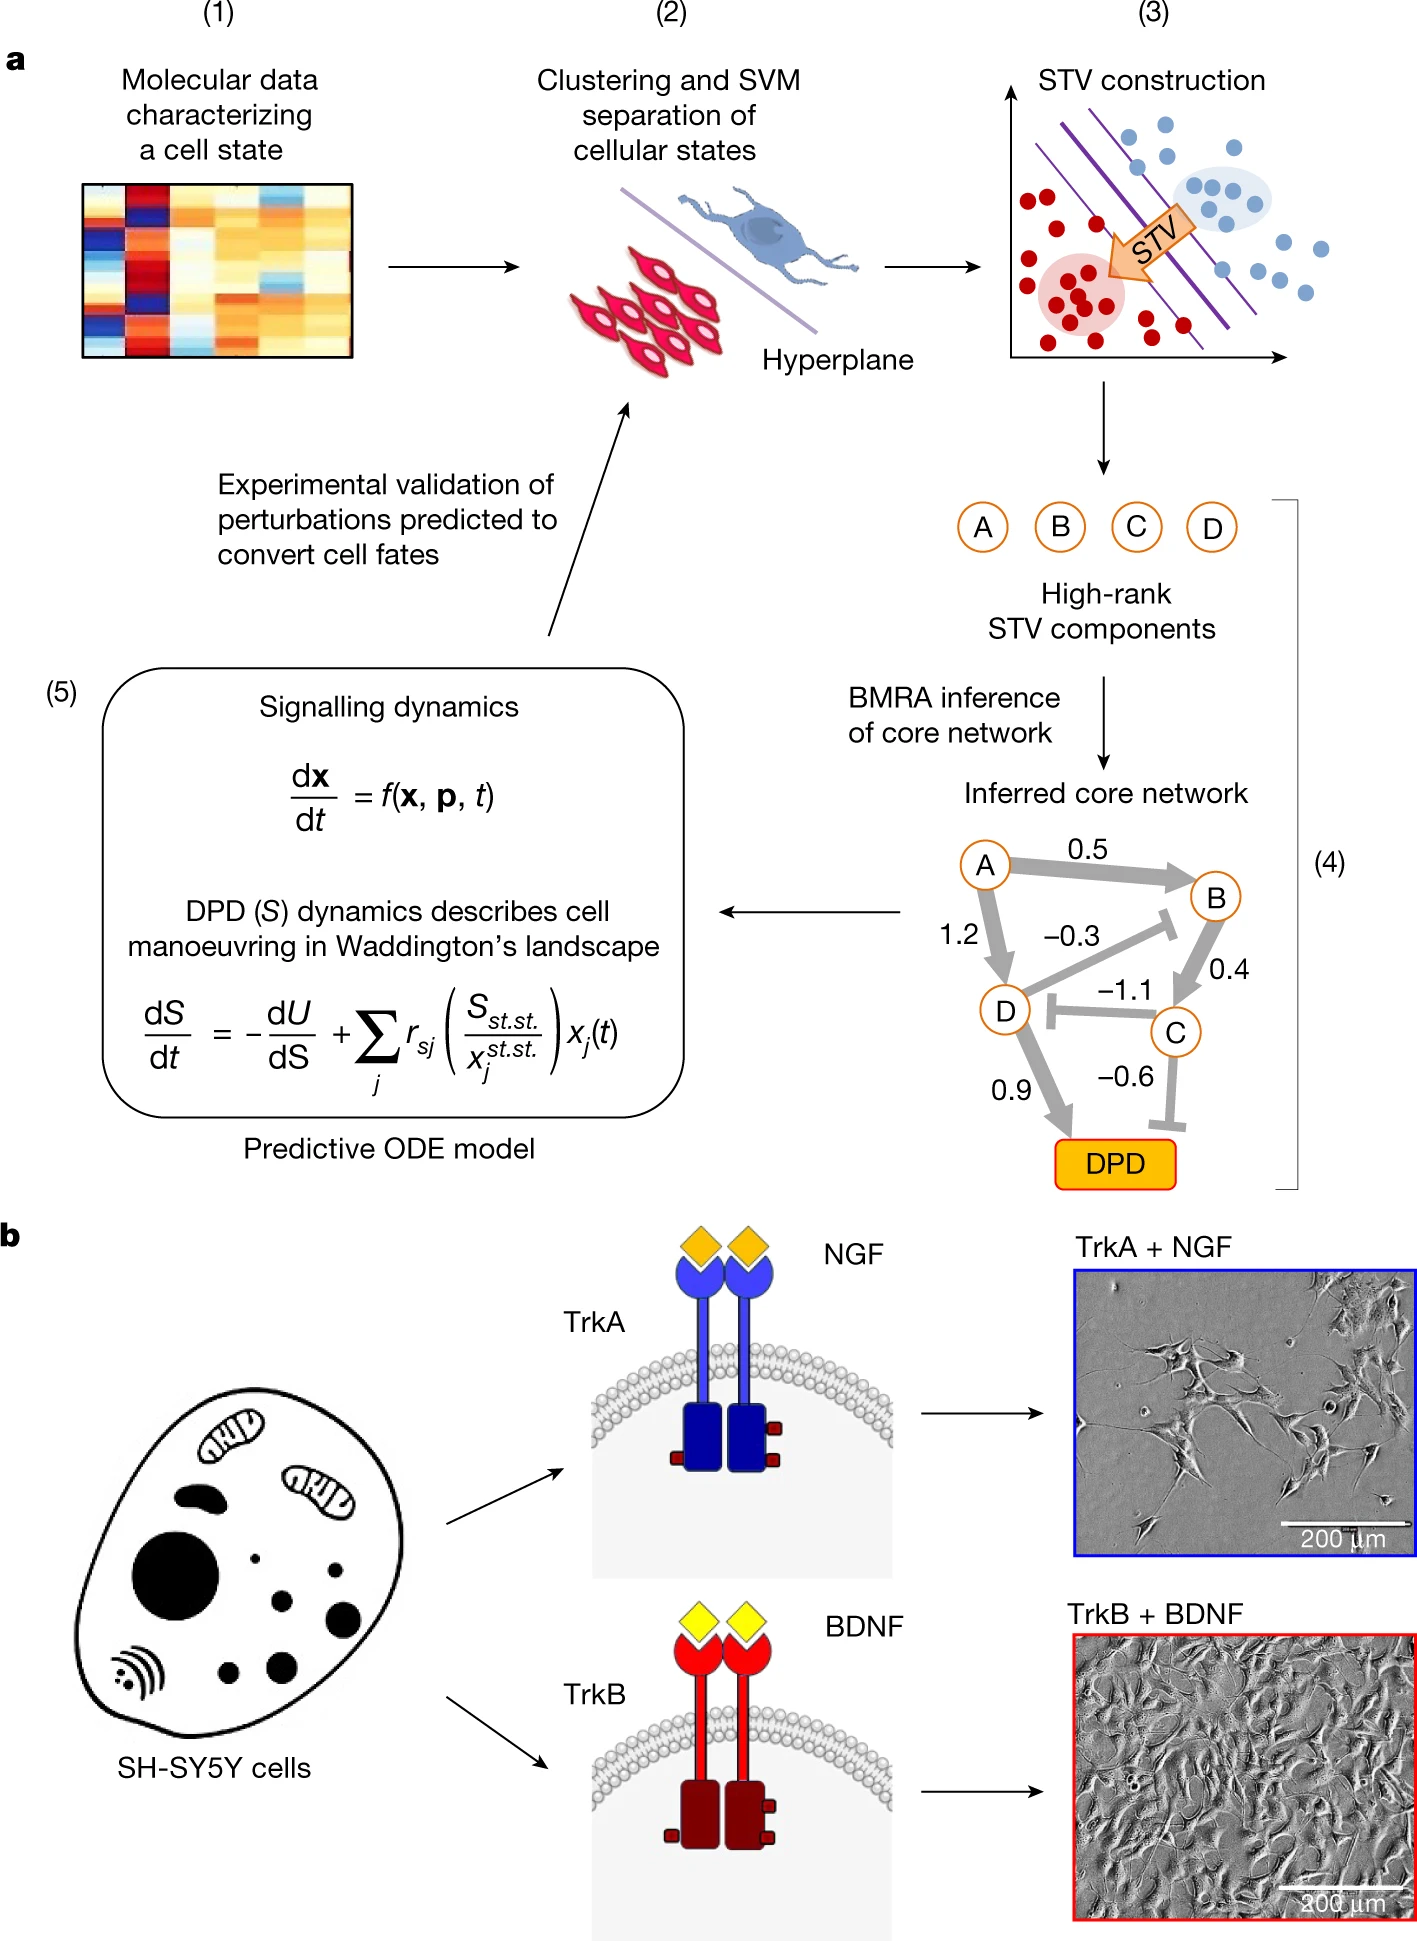

[Ссылка на статью](https://www.nature.com/articles/s41586-022-05194-y)